In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
# Step 1: Load the dataset
df = pd.read_csv('googleplaystore_updated.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2023-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2023-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2023-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2023-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2023-06-20,1.1,4.4 and up


In [3]:
# Step 2: Data Cleaning and Preprocessing
df = df.dropna()

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Category', 'Content Rating'], drop_first=True)

In [4]:

# Selecting the features and target
X = df[['Installs', 'Reviews', 'Size', 'Price'] + list(df.filter(like='Category_').columns)]
y = df['Rating']

In [5]:
# Clean 'Installs' and convert to float
X['Installs'] = pd.to_numeric(X['Installs'].astype(str).str.replace('+', '').str.replace(',', ''), errors='coerce')
# Convert 'Reviews' to float
X['Reviews'] = pd.to_numeric(X['Reviews'].astype(str), errors='coerce')

In [6]:
# Define the convert_size function for the 'Size' column
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    return np.nan

In [7]:
# Apply convert_size function to 'Size' column
X['Size'] = X['Size'].apply(lambda x: convert_size(str(x)))
# Clean 'Price' and convert to float
X['Price'] = pd.to_numeric(X['Price'].astype(str).str.replace('$', ''), errors='coerce')

In [8]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [10]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Step 4: Train Regression Models

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf

array([4.01 , 4.241, 4.116, ..., 4.512, 4.351, 4.433])

In [12]:
# Support Vector Regressor (SVR)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm

array([4.29756008, 4.29685528, 4.30298942, ..., 4.30180527, 4.29048886,
       4.40074631])

In [13]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr

array([4.14013167, 4.17785214, 4.25833102, ..., 4.2581539 , 4.16701562,
       4.39908042])

In [15]:
# Step 5: Evaluate Models (using R² score and MSE)
#Random Forest
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(rf_mae)
print(rf_mse)

0.3081545584045583
0.22553052415242164


In [16]:
#Support Vector Machine
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
print(svm_mae)
print(svm_mse)



0.33815079849410307
0.2625873794114871


In [18]:
#Linear Regression
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(lr_mae)
print(lr_mse)

0.34956452625605305
0.2507387943001178


In [23]:
# Step 6: Compare and Visualize Results
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Linear Regression'],
    'MAE': [rf_mae, svm_mae, lr_mae],
    'MSE': [rf_mse, svm_mse, lr_mse]
})

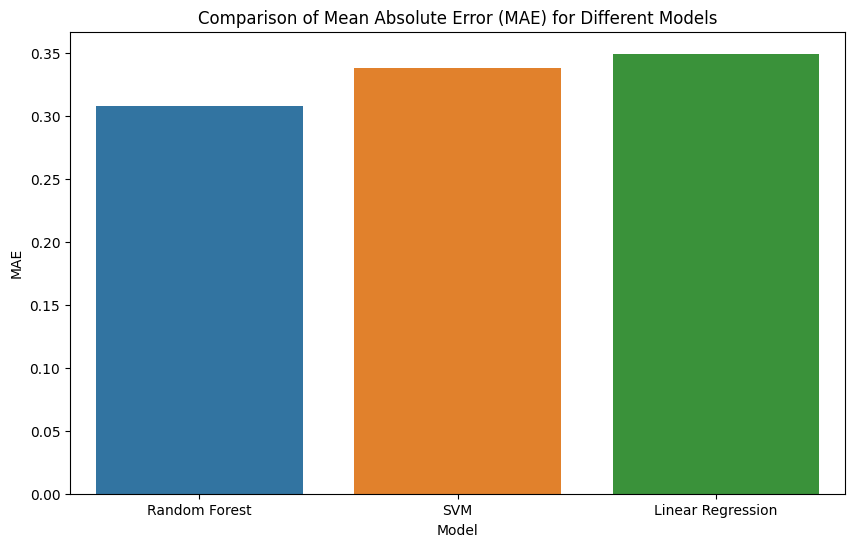

In [24]:
# Plotting the comparison of R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Comparison of Mean Absolute Error (MAE) for Different Models')
plt.show()

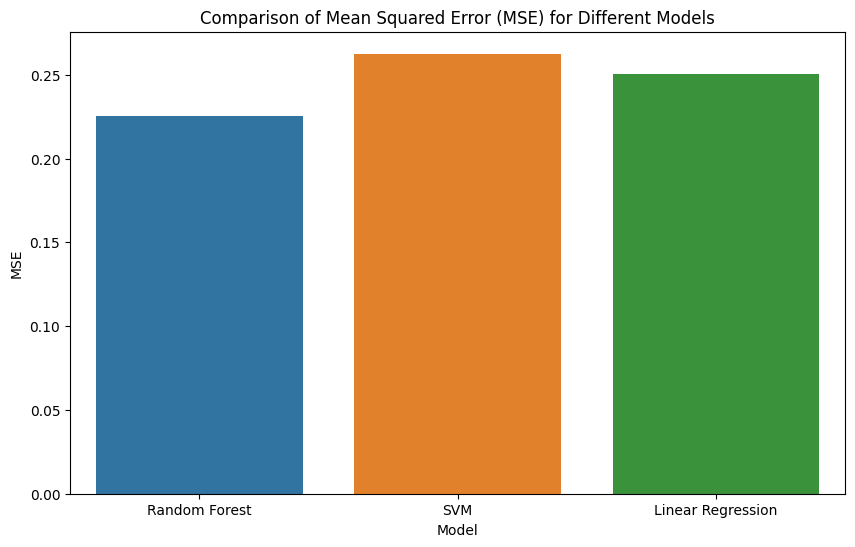

In [25]:
# Plotting the comparison of MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.show()

In [26]:
# Step 7: Predict for a New Entry

# Define one new entry as a dictionary (sample data)
new_entry = {
    'Installs': '100,000+',
    'Reviews': '6000',
    'Size': '40M',
    'Price': '$1.05'
}

# Convert the dictionary to a DataFrame (since models expect data in DataFrame format)
new_entry_df = pd.DataFrame([new_entry])
new_entry_df

,Installs,Reviews,Size,Price
0,"100,000+",6000,40M,$1.05


In [27]:
# Preprocess new entry (same as training data)
new_entry_df['Installs'] = pd.to_numeric(new_entry_df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
new_entry_df['Reviews'] = pd.to_numeric(new_entry_df['Reviews'], errors='coerce')
new_entry_df['Size'] = new_entry_df['Size'].apply(convert_size)
new_entry_df['Price'] = pd.to_numeric(new_entry_df['Price'].str.replace('$', ''), errors='coerce')

In [28]:
# One-hot encode to match the training data
new_entry_df = pd.get_dummies(new_entry_df)

In [29]:
# Ensure the new_data DataFrame has the same structure (features) as X_train
# Add any missing columns with 0 values (since they were in the original training data)
missing_cols = set(X.columns) - set(new_entry_df.columns)
for col in missing_cols:
    new_entry_df[col] = 0

In [30]:
# Ensure columns are in the same order
new_entry_df = new_entry_df[X.columns]

In [31]:
# Impute missing values in new entry
new_entry_imputed = imputer.transform(new_entry_df)

In [32]:
# Scale the features
new_entry_scaled = scaler.transform(new_entry_imputed)

In [33]:
# Predict using the Linear Regression model
rating_prediction_lr = round(lr_model.predict(new_entry_scaled)[0], 2)
# Predict using the Random Forest model
rating_prediction_rf = round(rf_model.predict(new_entry_scaled)[0], 2)
# Predict using the SVM model
rating_prediction_svm = round(svm_model.predict(new_entry_scaled)[0], 2)

In [34]:
print(f"Predicted Rating using Linear Regression: {rating_prediction_lr}")
print(f"Predicted Rating using Random Forest: {rating_prediction_rf}")
print(f"Predicted Rating using SVM: {rating_prediction_svm}")

Predicted Rating using Linear Regression: 4.46
Predicted Rating using Random Forest: 4.53
Predicted Rating using SVM: 4.5
